In [1]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
# original data from kaggle
sales = pd.read_csv('/Users/galvanize/Desktop/final_project/data/summer-products-with-rating-and-performance_2020-08.csv')

In [4]:
# original data from kaggle
unique_tag = pd.read_csv('/Users/galvanize/Desktop/final_project/data/unique-categories_tags.csv')

In [5]:
#sales.describe()
#sales.head()
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1528 non-null   float64
 10  rating_four_count             1528 non-null   float64
 11  rating_three_count            1528 non-null   float64
 12  rating_two_count              1528 non-null   float64
 13  rat

In [1]:
# commit

# Cleaning Data

Below are different things I have done to clean up the data

In [6]:
# see we have some nulls
sales.isnull().sum()[sales.isnull().sum() !=0]

rating_five_count              45
rating_four_count              45
rating_three_count             45
rating_two_count               45
rating_one_count               45
product_color                  41
product_variation_size_id      14
has_urgency_banner           1100
urgency_text                 1100
origin_country                 17
merchant_name                   4
merchant_info_subtitle          1
merchant_profile_picture     1347
dtype: int64

# 1. Replace NA with 0


In [7]:
#For the ratings I don't want to get rid of the rows and the nulls are important information.  I will replace with 0
# rating features
sales['rating_five_count'].replace(np.nan, 0, inplace=True)
sales['rating_four_count'].replace(np.nan, 0, inplace=True)
sales['rating_three_count'].replace(np.nan, 0, inplace=True)
sales['rating_two_count'].replace(np.nan, 0, inplace=True)
sales['rating_one_count'].replace(np.nan, 0, inplace=True)
sales['merchant_profile_picture'].replace(np.nan, 0, inplace=True)
sales['has_urgency_banner'].replace(np.nan, 0, inplace=True)
sales['product_color'].replace(np.nan, 0, inplace=True)
sales['urgency_text'].replace(np.nan, 0, inplace=True)
sales['origin_country'].replace(np.nan, 0, inplace=True)



In [8]:
sales.isnull().sum()[sales.isnull().sum() !=0]

product_variation_size_id    14
merchant_name                 4
merchant_info_subtitle        1
dtype: int64

In [9]:
sales.info()
#sales.head()
#sales.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1573 non-null   object 
 1   title_orig                    1573 non-null   object 
 2   price                         1573 non-null   float64
 3   retail_price                  1573 non-null   int64  
 4   currency_buyer                1573 non-null   object 
 5   units_sold                    1573 non-null   int64  
 6   uses_ad_boosts                1573 non-null   int64  
 7   rating                        1573 non-null   float64
 8   rating_count                  1573 non-null   int64  
 9   rating_five_count             1573 non-null   float64
 10  rating_four_count             1573 non-null   float64
 11  rating_three_count            1573 non-null   float64
 12  rating_two_count              1573 non-null   float64
 13  rat

# 2.  data types

In [10]:
#sales.dtypes[sales.dtypes == 'int']
#sales.dtypes[sales.dtypes == 'object']
sales.dtypes[sales.dtypes == 'float']

price                 float64
rating                float64
rating_five_count     float64
rating_four_count     float64
rating_three_count    float64
rating_two_count      float64
rating_one_count      float64
has_urgency_banner    float64
merchant_rating       float64
dtype: object

# 3. Delete duplicate rows

In [11]:
sales.drop_duplicates(subset ="product_id", inplace = True) 
sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 43 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1341 non-null   object 
 1   title_orig                    1341 non-null   object 
 2   price                         1341 non-null   float64
 3   retail_price                  1341 non-null   int64  
 4   currency_buyer                1341 non-null   object 
 5   units_sold                    1341 non-null   int64  
 6   uses_ad_boosts                1341 non-null   int64  
 7   rating                        1341 non-null   float64
 8   rating_count                  1341 non-null   int64  
 9   rating_five_count             1341 non-null   float64
 10  rating_four_count             1341 non-null   float64
 11  rating_three_count            1341 non-null   float64
 12  rating_two_count              1341 non-null   float64
 13  rat

# 4. Urgency Text

fix the urgency text column

In [12]:
#Change the wording to english for urgency text
sales['urgency_text'] = sales['urgency_text'].replace({'Quantité limitée !':'Limited_quantity!', 'Réduction sur les achats en gros':'Discount_on_wholesale_purchases'})

In [13]:
sales.urgency_text.unique()

array(['Limited_quantity!', 0, 'Discount_on_wholesale_purchases'],
      dtype=object)

In [14]:
sales.urgency_text

0       Limited_quantity!
1       Limited_quantity!
2       Limited_quantity!
3                       0
4       Limited_quantity!
              ...        
1565    Limited_quantity!
1567                    0
1568                    0
1570                    0
1572                    0
Name: urgency_text, Length: 1341, dtype: object

# 5. Revenue

In [15]:
#create a new column for revenue
sales['revenue'] = sales['price']* sales['units_sold']
sales.info()
sales.revenue.sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1341 entries, 0 to 1572
Data columns (total 44 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title                         1341 non-null   object 
 1   title_orig                    1341 non-null   object 
 2   price                         1341 non-null   float64
 3   retail_price                  1341 non-null   int64  
 4   currency_buyer                1341 non-null   object 
 5   units_sold                    1341 non-null   int64  
 6   uses_ad_boosts                1341 non-null   int64  
 7   rating                        1341 non-null   float64
 8   rating_count                  1341 non-null   int64  
 9   rating_five_count             1341 non-null   float64
 10  rating_four_count             1341 non-null   float64
 11  rating_three_count            1341 non-null   float64
 12  rating_two_count              1341 non-null   float64
 13  rat

52357352.45

In [16]:
sales.units_sold.sum()

6464509

# 5. Color

In [ ]:
# Change the column color to be more sycronized

In [17]:
sales['product_color']=sales['product_color'].str.lower()

In [21]:
pd_colr= sales['product_color'].value_counts()
pd_colr

black         270
white         211
blue          138
red           120
green         114
pink           96
yellow         83
grey           78
purple         51
dual           36
beige          29
orange         26
print          20
multicolor     18
brown          11
Name: product_color, dtype: int64

In [19]:
sales['product_color'] = sales['product_color'].replace('white & green', 'dual')
sales['product_color'] = sales['product_color'].replace('black & white', 'dual')
sales['product_color'] = sales['product_color'].replace('black & green', 'dual')
sales['product_color'] = sales['product_color'].replace('black & yellow', 'dual')
sales['product_color'] = sales['product_color'].replace('white & black', 'dual')
sales['product_color'] = sales['product_color'].replace('navy blue', 'blue')
sales['product_color'] = sales['product_color'].replace('burgundy', 'red')
sales['product_color'] = sales['product_color'].replace('mintgreen', 'green')
sales['product_color'] = sales['product_color'].replace('dustypink', 'pink')
sales['product_color'] = sales['product_color'].replace('coolblack', 'black')
sales['product_color'] = sales['product_color'].replace('black & blue', 'dual')
sales['product_color'] = sales['product_color'].replace('lightyellow', 'yellow')
sales['product_color'] = sales['product_color'].replace('pink & black', 'dual')
sales['product_color'] = sales['product_color'].replace('pink & grey', 'dual')
sales['product_color'] = sales['product_color'].replace('silver', 'grey')
sales['product_color'] = sales['product_color'].replace('wine', 'red')
sales['product_color'] = sales['product_color'].replace('whitefloral', 'print')
sales['product_color'] = sales['product_color'].replace('blackwhite', 'dual')
sales['product_color'] = sales['product_color'].replace('winered & yellow', 'dual')
sales['product_color'] = sales['product_color'].replace('whitestripe', 'print')
sales['product_color'] = sales['product_color'].replace('watermelonred', 'red')
sales['product_color'] = sales['product_color'].replace('darkgreen', 'green')
sales['product_color'] = sales['product_color'].replace('lightred', 'red')
sales['product_color'] = sales['product_color'].replace('coralred', 'red')
sales['product_color'] = sales['product_color'].replace('rainbow', 'print')
sales['product_color'] = sales['product_color'].replace('lakeblue', 'blue')
sales['product_color'] = sales['product_color'].replace('pink & blue', 'dual')
sales['product_color'] = sales['product_color'].replace('lightgrey', 'grey')
sales['product_color'] = sales['product_color'].replace('denimblue', 'blue')
sales['product_color'] = sales['product_color'].replace('jasper', 'red')
sales['product_color'] = sales['product_color'].replace('claret', 'red')
sales['product_color'] = sales['product_color'].replace('nude', 'beige')
sales['product_color'] = sales['product_color'].replace('tan', 'beige')
sales['product_color'] = sales['product_color'].replace('offblack', 'black')
sales['product_color'] = sales['product_color'].replace('violet', 'purple')
sales['product_color'] = sales['product_color'].replace('lightkhaki', 'beige')
sales['product_color'] = sales['product_color'].replace('lightgray', 'grey')
sales['product_color'] = sales['product_color'].replace('star', 'print')
sales['product_color'] = sales['product_color'].replace('greysnakeskinprint', 'print')
sales['product_color'] = sales['product_color'].replace('leopardprint', 'print')
sales['product_color'] = sales['product_color'].replace('wine red', 'red')
sales['product_color'] = sales['product_color'].replace('black & stripe', 'print')
sales['product_color'] = sales['product_color'].replace('red & blue', 'dual')
sales['product_color'] = sales['product_color'].replace('blue & pink', 'dual')
sales['product_color'] = sales['product_color'].replace('camel', 'beige')
sales['product_color'] = sales['product_color'].replace('orange & camouflage', 'print')
sales['product_color'] = sales['product_color'].replace('rosegold', 'pink')
sales['product_color'] = sales['product_color'].replace('light green', 'green')
sales['product_color'] = sales['product_color'].replace('gold', 'yellow')
sales['product_color'] = sales['product_color'].replace('navyblue & white', 'dual')
sales['product_color'] = sales['product_color'].replace('white & red', 'dual')
sales['product_color'] = sales['product_color'].replace('rose red', 'red')
sales['product_color'] = sales['product_color'].replace('ivory', 'white')
sales['product_color'] = sales['product_color'].replace('pink & white', 'dual')
sales['product_color'] = sales['product_color'].replace('applegreen', 'green')
sales['product_color'] = sales['product_color'].replace('lightpurple', 'purple')
sales['product_color'] = sales['product_color'].replace('brown & yellow', 'dual')
sales['product_color'] = sales['product_color'].replace('gray & white', 'dual')
sales['product_color'] = sales['product_color'].replace('prussianblue', 'blue')
sales['product_color'] = sales['product_color'].replace('offwhite', 'white')
sales['product_color'] = sales['product_color'].replace('army', 'green')
sales['product_color'] = sales['product_color'].replace('armygreen', 'green')
sales['product_color'] = sales['product_color'].replace('army green', 'green')
sales['product_color'] = sales['product_color'].replace('navyblue', 'blue')
sales['product_color'] = sales['product_color'].replace('black & green', 'dual')
sales['product_color'] = sales['product_color'].replace('khaki', 'beige')
sales['product_color'] = sales['product_color'].replace('lightblue', 'blue')
sales['product_color'] = sales['product_color'].replace('gray', 'grey')
sales['product_color'] = sales['product_color'].replace('rosered', 'red')
sales['product_color'] = sales['product_color'].replace('skyblue', 'blue')
sales['product_color'] = sales['product_color'].replace('coffee', 'brown')
sales['product_color'] = sales['product_color'].replace('darkblue', 'blue')
sales['product_color'] = sales['product_color'].replace('floral', 'print')
sales['product_color'] = sales['product_color'].replace('rose', 'pink')
sales['product_color'] = sales['product_color'].replace('lightpink', 'pink')
sales['product_color'] = sales['product_color'].replace('navy', 'blue')
sales['product_color'] = sales['product_color'].replace('leopard', 'print')
sales['product_color'] = sales['product_color'].replace('fluorescentgreen', 'green')
sales['product_color'] = sales['product_color'].replace('orange-red', 'dual')
sales['product_color'] = sales['product_color'].replace('camouflage', 'print')
sales['product_color'] = sales['product_color'].replace('lightgreen', 'green')
sales['product_color'] = sales['product_color'].replace('winered', 'red')
sales['product_color'] = sales['product_color'].replace('apricot', 'orange')


pd_colr = sales['product_color'].value_counts()

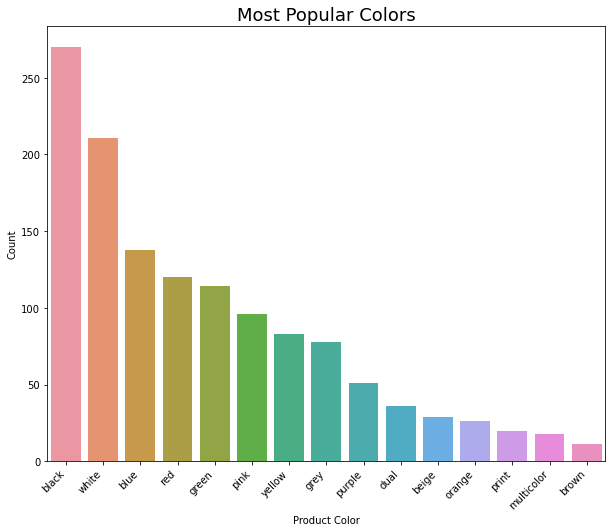

In [20]:
# Show Most popular colors
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_color',
              data = sales,
              order = sales['product_color'].value_counts().index,
              ax = ax)
ax.set(xlabel='Product Color', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.title("Most Popular Colors", size=18)
plt.show()

# 6. Origin Country


In [22]:
sales.origin_country.unique()

array(['CN', 'US', 0, 'VE', 'AT', 'SG', 'GB'], dtype=object)

In [23]:
sales['origin_country'] = sales['origin_country'].replace(0, 'Other')
sales['origin_country'] = sales['origin_country'].replace('VE', 'Other')
sales['origin_country'] = sales['origin_country'].replace('SG', 'Other')
sales['origin_country'] = sales['origin_country'].replace('AT', 'Other')
sales['origin_country'] = sales['origin_country'].replace('GB', 'Other')

Text(0.5, 1.0, 'Origin Company')

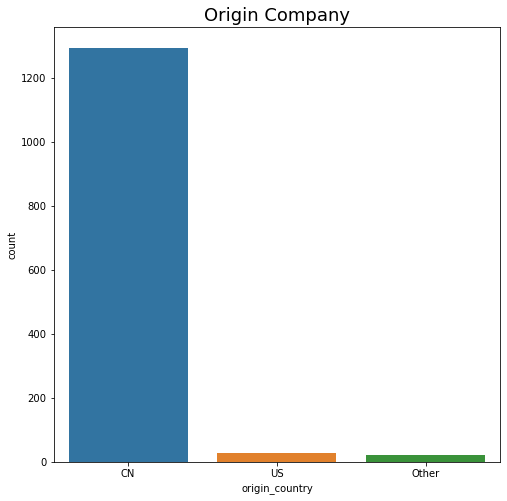

In [24]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('origin_country',
              data = sales,
              ax = ax)
plt.title("Origin Company", size=18)

 most poducts come from china.  No further investigation needed.  May look into rate for US items to see if higher at later date.

# 7. Sizing

In [25]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [26]:
#look through the sizes
sales['product_variation_size_id'].value_counts()

S                               556
XS                              292
M                               177
XXS                              74
L                                45
XL                               15
S.                               13
XXL                              12
XS.                               5
XXXS                              5
2XL                               4
4XL                               4
s                                 4
33                                3
Size-S                            3
SIZE XS                           3
10 ml                             3
M.                                3
Size S                            3
34                                3
Size-XS                           3
SizeL                             2
3XL                               2
XXXXXL                            2
29                                2
Size -XXS                         2
2pcs                              2
35                          

In [27]:
#replace the sizing to become more sync
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('S.', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('s', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('XS.', 'XS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SIZE XS', 'XS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size-XS', 'XS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('M.', 'M')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('34', 'Other')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('33', 'Other')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('10 ml', 'Other')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('2pcs', 'Other')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SizeL', 'L')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size-S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size -XXS', 'XXS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('1 pc.', 'Other')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('25', 'XS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size M', 'M')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('S Pink', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size S.', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('One Size', 'Other')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('35', 'Other')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SIZE-XXS', 'XXS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('1', 'XS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size4XL', '4XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('XXXXL', '4XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('29', 'M')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('EU 35', 'Other')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('size S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Suit-S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('XXXXXL', '5XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('S(bust 88cm)', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('pants-S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size-5XL', '5XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SIZE S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('XXXL', '3XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('S(Pink & Black)', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('26(Waist 72cm 28inch)','XS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('1 PC - XL','XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('L.','L')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('32/L','L')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('4','S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('S Diameter 30cm','S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SIZE/S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SIZE-XXS', 'XXS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SIZE XXS', 'XXS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('EU39(US8)', 'M')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('S (waist58-62cm)', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('US-S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('US--S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('S..', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('X   L', 'XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SIZE XXS', 'XXS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('25-S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('SIZE-4XL', '4XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('04-3XL', '3XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('XXL', '2XL')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size/S', 'S')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size XXS', 'XXS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size--S', 'XXS')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size-L', 'L')
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace('Size-XXS', 'XXS')

In [28]:
sales['product_variation_size_id'].value_counts()

S                               595
XS                              307
M                               185
XXS                              81
L                                50
Other                            18
XL                               17
2XL                              16
4XL                               8
XXXS                              5
5XL                               4
3XL                               4
4-5 Years                         1
Floating Chair for Kid            1
2                                 1
Women Size 37                     1
30 cm                             1
B                                 1
80 X 200 CM                       1
5PAIRS                            1
17                                1
S/M(child)                        1
20PCS-10PAIRS                     1
5                                 1
Base Coat                         1
AU plug Low quality               1
3 layered anklet                  1
100 cm                      

In [29]:
#replace all non item things with 'other'
def pr_var(name):
    if name == 'XXXS' \
    or name == 'XXS' \
    or name == 'XS' \
    or name == 'S' \
    or name == 'M' \
    or name == 'L' \
    or name == 'XL' \
    or name == '2XL' \
    or name == '3XL' \
    or name == '4XL' \
    or name == '5XL' \
    or name == '6XL':
        return name
    else:
        return "OTHER"
    
sales['product_variation_size_id'] = sales['product_variation_size_id'].replace(np.nan, 'OTHER')
sales['product_variation_size_id'] = sales['product_variation_size_id'].apply(pr_var)

In [30]:
sales['product_variation_size_id'].value_counts()

S        595
XS       307
M        185
XXS       81
OTHER     68
L         50
XL        17
2XL       16
4XL        8
XXXS       5
3XL        4
5XL        4
6XL        1
Name: product_variation_size_id, dtype: int64

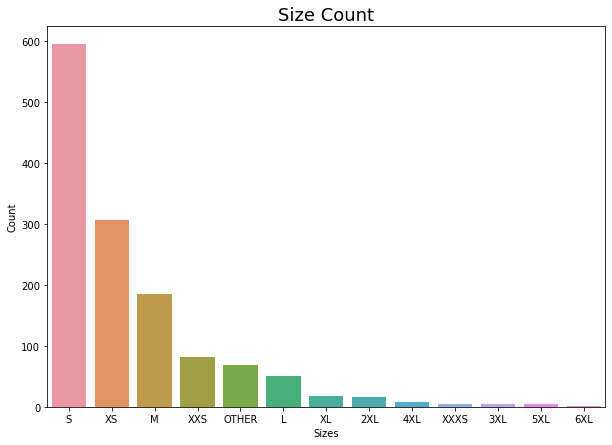

In [31]:
#count of size
fig_dims = (10, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('product_variation_size_id',
              order = sales['product_variation_size_id'].value_counts().index,
              data = sales,
              ax = ax)
ax.set(xlabel='Sizes', ylabel='Count')
plt.title("Size Count", size=18)
plt.show()

# 8. Units Sold

In [32]:
# bucket smaller counts into 10
pr_unit = sales['units_sold'].value_counts()
pr_unit

100       396
1000      362
5000      200
10000     163
20000      99
50         50
10         36
50000      17
100000      6
1           3
8           2
7           2
3           2
2           2
6           1
Name: units_sold, dtype: int64

In [33]:
# bucket smaller counts into 10 or below bucket
def pr_units(item):
    if item == 10 \
    or item == 50 \
    or item == 100 \
    or item == 1000 \
    or item == 5000 \
    or item == 10000 \
    or item == 20000 \
    or item == 50000 \
    or item == 100000:
        return item
    else:
        return 10

In [34]:
sales['units_sold'] = sales['units_sold'].apply(pr_units)
pr_unit = sales['units_sold'].value_counts()
pr_unit

100       396
1000      362
5000      200
10000     163
20000      99
50         50
10         48
50000      17
100000      6
Name: units_sold, dtype: int64

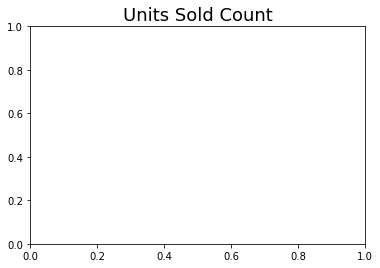

In [35]:
# visuals of Units Sold
fig_dims = (10, 8)
sns.countplot('units_sold',
              data = sales,
              order = sales['units_sold'].value_counts().index,
              ax = ax)
plt.title("Units Sold Count", size=18)
plt.show()

# 9. Popular product tags in Summer Women - 2020

NameError: name 'sort_tag' is not defined

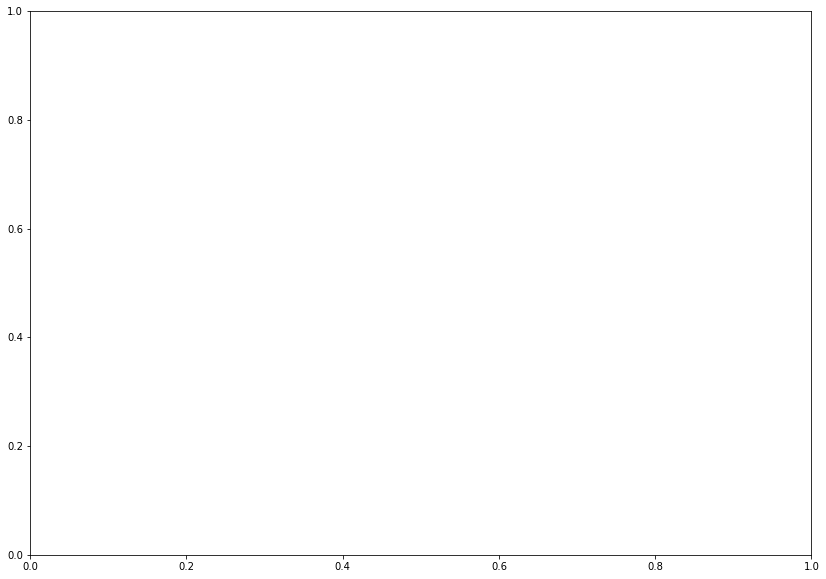

In [36]:
fig_dims = (14, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = 'keyword',
            y = 'count',
            data = sort_tag.iloc[:30],
            ax = ax)
ax.set(xlabel='Keyword', ylabel='Count')
plt.xticks(rotation=45, ha='right')
plt.title("Product Tags Count", size=18)
plt.show()

Created word cloud in tableou

We can see that some words are repeating and we need to do some cleaning of the tags to fully understand the Tags

# 10 Price Drop

In [ ]:
sales['price_drop'] = sales["retail_price"] * sales["price"]
sales.info()

# Visualizations

#visualized various variables together

In [ ]:
# write the df to csv to put in tablou
sales.to_csv('/Users/galvanize/Desktop/final_project/rev_summer.csv', index = False)


# Visual: Color

In [ ]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.set_style("whitegrid")

sns.barplot(x = 'product_color', y = 'revenue', data=sales, ci=False)

plt.title("Colors Sold", size=18)
plt.show()

In [ ]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.set_style("whitegrid")

sns.barplot(x = 'product_color', y = 'units_sold', data=sales, ci=False)

plt.title("Color Sold", size=18)
plt.show()

# Visual: Size

In [ ]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.set_style("whitegrid")

sns.barplot(x = 'product_variation_size_id', y = 'revenue', data=sales, ci=False)
plt.title("Size Sold", size=18)
plt.show()

In [ ]:
sns.barplot(x = 'product_variation_size_id', y = 'units_sold', data=sales, ci=False)

plt.title("Size", size=18)
plt.show()

# Visualize: KPI ( Revenue, Units Sold, Price, Retail Price)

In [ ]:
#Total Revenue
sales.revenue.sum()

In [ ]:
#Total Units Sold
sales.units_sold.sum()

In [ ]:
# on average 8.099111226096668 revenue was produced per item sold

In [ ]:
# UNITS SOLD
sns.set(rc={'figure.figsize': (10,4)})
sns.set_style("whitegrid")

# mean
mean10 = sales['units_sold'].mean()
plt.axvline(mean10,0, 1, color = 'black')

sns.distplot(sales['units_sold'], kde=True, color='g')
plt.title("Distribution of Units Sold", size=18)

plt.show()
print(mean10)

In [ ]:
sns.set(rc={'figure.figsize': (16,3)})
aa= sales['units_sold'].values

sns.boxplot(aa)

In [ ]:
# Price
sns.set(rc={'figure.figsize': (10,4)})
sns.set_style("whitegrid")

a = sales['price'].values
sns.distplot(a, color='#0098D3')

# mean
mean = sales['price'].mean()
plt.axvline(mean,0, 1, color = '#AFC7D1')

plt.xlabel("Price", size=15)
plt.title("Distribution of Price", size=18)

plt.tight_layout()
print(mean)

In [ ]:
sns.set(rc={'figure.figsize': (16,3)})
sns.boxplot(a)


In [ ]:
#RETAIL PRICE
sns.set(rc={'figure.figsize': (10,5)})
sns.set_style("whitegrid")

b = sales['retail_price'].values
sns.distplot(b, color='#0098D3')

# Calculating the mean
mean1 = sales['retail_price'].mean()
plt.axvline(mean1,0, 1, color = '#192A32')

plt.xlabel("Retail Price", size=15)
plt.title("Distribution of Retail_Price", size=18)

plt.tight_layout()

print (mean1)

In [ ]:
sns.set(rc={'figure.figsize': (16,3)})
sns.boxplot(b)


# Visual: Retail price Vs Price 


In [ ]:
sns.set(rc={'figure.figsize': (10, 8)})
sns.set_style("whitegrid")

In [ ]:
#Concentration of Retail price vs Price
sns.jointplot(x='price', y='retail_price', data=sales, kind='kde', xlim=(0,20), ylim=(-5,35), height=7)


In [ ]:
sns.scatterplot(x = 'price' , y = 'retail_price', data = sales, hue = 'units_sold', 
                    size = 'revenue', sizes = (20, 200),  palette = 'Dark2_r' )

plt.title("Price in relation to Revenue and units sold ", size=18)

plt.tight_layout()

In [ ]:
bf = sns.lmplot(x = "price", y = "retail_price", data = sales, height = 10, aspect = 1)


In [ ]:
sns.lmplot(x = 'price' , y = 'retail_price', data = sales, hue = 'units_sold',height = 10, aspect = 1)

plt.title("Distribution of Retail_Price and Units Sold", size=18)

plt.tight_layout()

Most items were place at a retail price between 6-8 eur with a price of 5-9 and 11-12.50 eru. 

Retail Price doesn't seems to make a difference in price

Price is not a normal distibution.
Retail price is normal distribution

Seems to be very little change from retail to price 

# Visual Shipping

In [ ]:
# SHIPPING PRICE
sns.set(rc={'figure.figsize': (10,3)})
sns.set_style("whitegrid")

c= sales['shipping_option_price'].values

# mean
mean2 = sales['shipping_option_price'].mean()
plt.axvline(mean2,0, 1, color = 'black')

sns.distplot(c, color='green')
plt.xlabel("Distribution of Shipping Price", size=15)
plt.tight_layout()

In [ ]:
sns.set(rc={'figure.figsize': (14, 8)})
sns.set_style("whitegrid")

In [ ]:
sns.countplot('shipping_option_price',
              data = sales,
              order = sales['shipping_option_price'].value_counts().iloc[:15].index)
ax.set(xlabel='shipping_option_price', ylabel='Count')
plt.title("Shipping Price", size=18)

plt.tight_layout()

In [ ]:
sns.barplot(x = 'shipping_option_price', y = 'units_sold',data=sales, ci= False)
plt.title("Units sold at different Shipping Prices", size=18)

plt.tight_layout()

Most items where sold with 1 2 3 or 6 dollar price for shipping

In [ ]:
cc = sns.barplot(x = 'shipping_option_price', y = 'revenue',data=sales, ci= False)
plt.title("Revenue at different Shipping Prices", size=18)

plt.tight_layout()

over 80000 eau was made with the shipping price being 6 eau

In [ ]:
sales['shipping_option_name'].value_counts()

In [ ]:
sales['shipping_option_price'].value_counts()

# Merchant

Created visual for Top Merchant in Tableau

In [ ]:
sales.info()

In [ ]:
# created data table 
tag_per_product = pd.read_csv('/Users/galvanize/Desktop/final_project/tags_value_per_product.csv')

In [ ]:
sns.set(rc={'figure.figsize': (10,7)})
sns.set_style("whitegrid")

In [ ]:
gg= tag_per_product['tags_value'].values

# Calculating the mean
mean1 = tag_per_product['tags_value'].mean()

sns.distplot(gg, color='blue')

# plotting the mean

plt.axvline(mean1,0, 1, color = 'red')

plt.title("Distribution of Tags", size=15)
plt.xlabel("Number of Tags", size=10)
plt.tight_layout()

# Badges

In [ ]:
fig_dims = (8, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot('badges_count',
              data = sales,
              ax = ax)
plt.title("Number of Badges", size=18)

Since most rows have no badges I don't think that badges are improtant to growth 

# Rating

In [ ]:
#Distribution and Mean
sns.set(rc={'figure.figsize': (10,3)})
sns.set_style("whitegrid")

t= sales['rating'].values

# mean
mean3 = sales['rating'].mean()
plt.axvline(mean3,0, 1, color = 'black')
mean3
sns.distplot(t, color='green')
plt.xlabel("Distribution Rating", size=15)
plt.tight_layout()

print (mean3)

In [ ]:
ba =sns.scatterplot(x = 'rating' , y = 'revenue', data = sales, color = 'green', marker = "p")

plt.xlabel("Distribution Ratings by Revenue ", size=15)
plt.tight_layout()

In [ ]:
bb =sns.scatterplot(x = 'rating' , y = 'units_sold', data = sales, color = '#0098D3', marker = "p")

plt.xlabel("Distribution Ratings by units sold", size=15)
plt.tight_layout()

In [ ]:
bc =sns.scatterplot(x = 'rating' , y = 'price', data = sales, color = 'blue', marker = "p")

plt.xlabel("Distribution of Rating by Price ", size=15)
plt.tight_layout()

# Visual: Inventory

In [ ]:
sales.inventory_total.value_counts()

In [ ]:
sns.set(rc={'figure.figsize': (10,3)})
sns.set_style("whitegrid")

k= sales['inventory_total'].values

# mean
mean5 = sales['inventory_total'].mean()
plt.axvline(mean2,0, 1, color = 'black')

sns.distplot(k, color='green')

plt.xlabel("Distribution of Inventory", size=15)
plt.tight_layout()

print (mean5)

All of the merchants have an inveotry of 50 or 0.  Having invetory is a good thing to have if you want to be a top merchant.

# Visual: Use Ad Boost

In [ ]:
sns.set(rc={'figure.figsize': (10,3)})
sns.set_style("whitegrid")

uab= sales['uses_ad_boosts'].values

# mean
mean8 = sales['uses_ad_boosts'].mean()
plt.axvline(mean8,0, 1, color = 'black')

sns.distplot(uab, color='green')

plt.xlabel("Distribution on Use of AD Boost", size=15)
plt.tight_layout()

print (mean8)

In [ ]:
sales.info()

In [ ]:
looks like we are split on if ad boost work to increase a product creating revenue.  

# Linear Regression: Units Sold

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

In [ ]:
# A. train/test split is done using sklearn
from sklearn.model_selection import train_test_split

In [ ]:
x = sales[['units_sold','price','product_color', 'retail_price','product_variation_size_id']]

In [ ]:
y = sales['merchant_rating']

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
sales_tr = pd.concat([x_train, y_train], axis = 1)
sales_tr.info()

In [ ]:
sns.pairplot(sales_tr)

In [ ]:
sns.scatterplot(x = 'merchant_rating' , y = 'units_sold', data = sales_tr)
#products with the highest revenue had a high rating

In [ ]:
# C. Make a linear regression model from the training data of sepal_length based on the other four variables 

In [ ]:
sales_tr

In [ ]:
sales_lm = smf.ols(formula='merchant_rating  ~  C(units_sold) +retail_price + C(product_color)+ C(product_variation_size_id)', data=sales_tr).fit()

sales_lm.summary()

In [ ]:
sales_lm.params

In [ ]:
#D. Make a linear regression model from the training data of petal_width based on the other four variables 

In [ ]:
sales_ts = pd.concat([x_test, y_test], axis = 1)
sales_ts.info()

In [ ]:
predictions= sales_lm.predict(sales_ts)

In [ ]:
predictions

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
#E. Compute the mean_squared_error and r2_score using the test data for your models from C) and D) above

In [ ]:
r2_score(sales_ts['merchant_rating'], predictions)

In [ ]:
mean_squared_error(sales_ts['merchant_rating'], predictions)